# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     741.8
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           6.09e-39
Time:                        13:43:40   Log-Likelihood:                -3.0577
No. Observations:                  50   AIC:                             14.12
Df Residuals:                      46   BIC:                             21.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0556      0.091     55.309      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.55910626  5.01526835  5.43542923  5.79503293  6.0783856   6.28123395
  6.41146411  6.48780589  6.53675557  6.58822262  6.67061568  6.80617506
  7.00731877  7.27460223  7.59662705  7.95191373  8.3124307   8.64819981
  8.93222167  9.14491156  9.27731717  9.33258939  9.32546469  9.2798439
  9.22486542  9.19011783  9.20077858  9.27347743  9.41356418  9.61422976
  9.8576249  10.11779275 10.36493349 10.57030039 10.71092276 10.77338004
 10.75600669 10.66916589 10.53354687 10.37676572 10.22882819 10.11719976
 10.06229321 10.07411481 10.15062034 10.27805093 10.43319365 10.58719525
 10.71030275 10.77675172]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.75613006 10.61561098 10.37286436 10.0681576   9.75449678  9.48464891
  9.29822272  9.21197109  9.21568932  9.27471361]


## Plot comparison

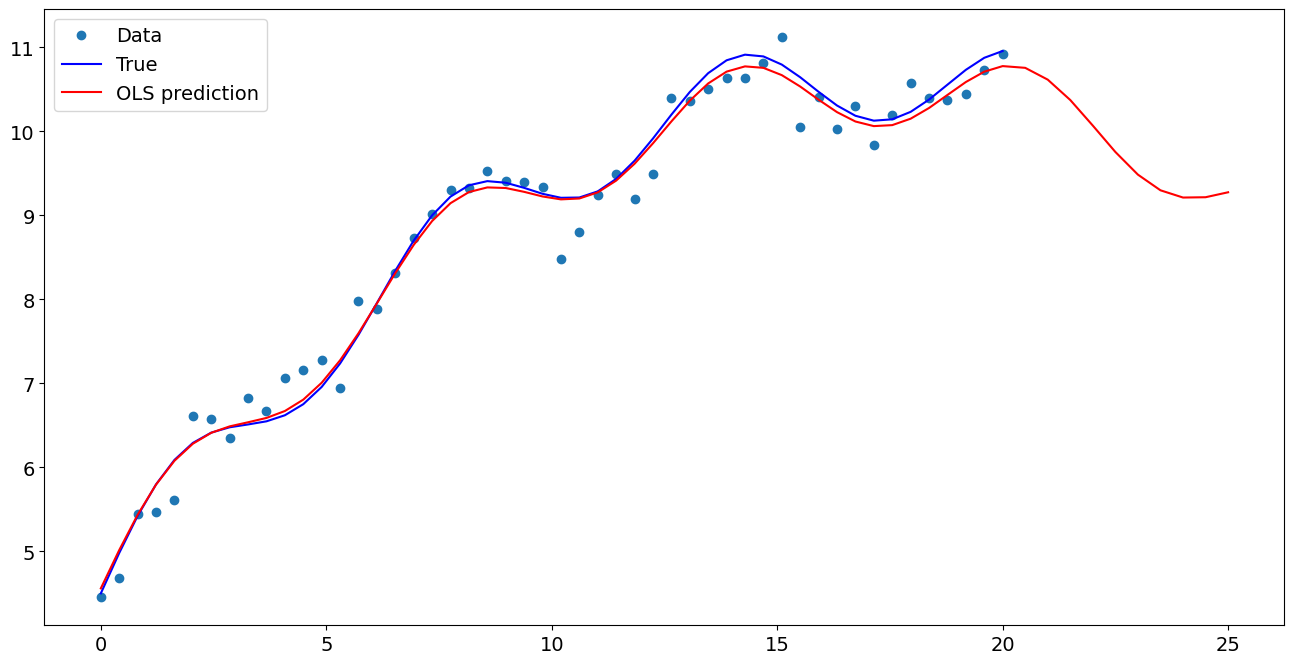

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.055632
x1                  0.488925
np.sin(x1)          0.450576
I((x1 - 5) ** 2)   -0.019861
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.756130
1    10.615611
2    10.372864
3    10.068158
4     9.754497
5     9.484649
6     9.298223
7     9.211971
8     9.215689
9     9.274714
dtype: float64